# <center>Laboratorium 3<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

Biblioteki niezbędne do wykonania zadania:

(instalacja: "pip install numpy scipy matplotlib memory_profiler")

In [1]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

%load_ext memory_profiler

***Materiały przygotowujące:***
- Standard IEEE 754 [PL](https://pl.wikipedia.org/wiki/IEEE_754) [EN](https://en.wikipedia.org/wiki/IEEE_754)
- Liczba zmiennoprzecinkowa [PL](https://pl.wikipedia.org/wiki/Liczba_zmiennoprzecinkowa) [EN](https://en.wikipedia.org/wiki/Floating-point_arithmetic)
- Arytmetyka zmiennoprzecinkowa [Python](https://docs.python.org/3.7/tutorial/floatingpoint.html)

***Profilowanie kodu:***
- [timeit](https://docs.python.org/2/library/timeit.html) - profilowanie czasu wykonywania kodu 
- [memit](https://pypi.org/project/memory-profiler/) - profilowanie pamięci zużywanej przez kod

Zarówno timeit jak i memit wspierają magic command w Jupyter notebook, co obrazuje poniższy przykład:

In [2]:
def func(size):
    a = np.random.random((size,size))
    b = np.random.random((size,size))
    c = a + b
    return c

for size in [100, 1000, 10000]:
    print('SIZE: ', size)
    print('Timing: ')
    saved_timing = %timeit -r 5 -n 10 -o func(size)
    saved_timing.average   # średni czas próby
    saved_timing.stdev     # odchylenie standardowe
    print('Memory usage: ')
    %memit func(size)
    print('\n')

SIZE:  100
Timing: 
217 µs ± 53.8 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 92.29 MiB, increment: 0.20 MiB


SIZE:  1000
Timing: 
18.5 ms ± 469 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 115.11 MiB, increment: 22.82 MiB


SIZE:  10000
Timing: 
1.97 s ± 18.3 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 2089.12 MiB, increment: 1996.86 MiB




***Zadanie 1.***  
Zaimplementuj funkcje obliczające błąd względny i bezwzględny (*relative_error* i *absolut_error*).
Funkcje przyjmują 2 argumenty: wartość dokładną oraz wartość przybliżoną, zwracając wartość błędu.
Implementacja powinna obsługiwać zarówno wartości skalarne, listy oraz wektory i macierze typu np.array z zachowaniem zasad [broadcastingu](https://numpy.org/doc/stable/user/basics.broadcasting.html).

**Wskazówka** Wykorzystuj funkcje *relative_error* i *absolut_error* w dalszej części laboratorium do analizy błędów.

In [3]:
print(main.absolut_error(20,19.7))
print(main.relative_error(20,19.7))

0.3000000000000007
0.015000000000000036


***Zadanie 2.***  
Zaimplementuj funkcje *p_diff*, która przyjmuje jako parametry wartości całkowite $n$ i rzeczywiste $c$ oraz zwraca różnicę (co do wartości bezwzględnej)   dwóch wyrażeń $P_1$ oraz $P_2$:  
  
a) $P_1 = b - b + c $  
b) $P_2 = b + c - b $  
  
gdzie $b = 2^n$

Analizując różnicę w otrzymanych wynikach zastosuj warotści:  
- $n \in \{1,2,3... 50\}$
- $c \in \{0.1, 0.125, 0.25, 0.33, 0.5, 0.6\}$
 
Następnie odpowiedź i zilustruj wykresami pytania:

1. Jaki wynik powinniśmy otrzymać?
2. Które z liczb mają skończoną a które nieskończoną reprezentację?    
3. Dlaczego wyniki się od siebie różnią?    
4. Jaki typ błędu tutaj występuje?
5. Czy istnieje możliwość poprawy działania tych wyrażeń, jeżeli tak to w jaki sposób?  


In [4]:
print(main.p_diff(2,0.1))
print(main.p_diff(10,0.125))
print(main.p_diff(20,0.25))
print(main.p_diff(30,0.33))
print(main.p_diff(50,0.5))
print(main.p_diff(28,0.6))


3.608224830031759e-16
0.0
0.0
7.629394532804312e-08
0.0
2.384185793236071e-08


Otrzymaliśmy przewidywane wyniki, czyli dla liczb którę mają skończoną reprezentację (liczby całkowite lub liczby dające się zapisać za pomocą sum potęgi 2) otrzymaliśmy 0 a dla liczb które mają nieskończoną reprezentacje(liczby zmiennoprzecinkowe,które nie dają się zapisać za pomocą sum potęgi 2) otrzymaliśmy małe błędy. Wyniki się różnią dlatego, że komputer nie może dokładnie zapisać liczb które mają nieskończoną reprezentacje, tylko bazuje na przybliżeniach. W tym zadaniu występuje błąd metody.Istnieje możliwość poprawy działania tych wyrażeń poprzez zwiększenie dokładności, jednak jest całkowicie nie będziemy w stanie wyeliminować błędów.

***Zadanie 3.***  
Wartości funkcji $\mathrm{e}^{x}$ można obliczyć w przybliżeniu z szeregu Taylora w następujący sposób:  
  
$\mathrm{e}^{x} \approx \sum\limits_{i=0}^{N}{\cfrac{1}{i!}x^{i}}$ 
  
na podstawie przedstawionych informacji zaimplementuj funkcje *exponential* która oblicza $\mathrm{e}^{x}$ z zadaną dokładnością $N$. Porównaj działanie utworzonej funkcji z [numpy.exp](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.exp.html). Odpowiedz na pytania:  

1. Jaki typ błędu obrazuje omawiany przykład?
2. Dokonaj analizy błędów bezwzględnych i względnych w zależności od wartości $n$.

16.375
20.063392857142855
20.08553692318766
20.085536923187668


Text(0, 0.5, 'Wartość błędu względnego')

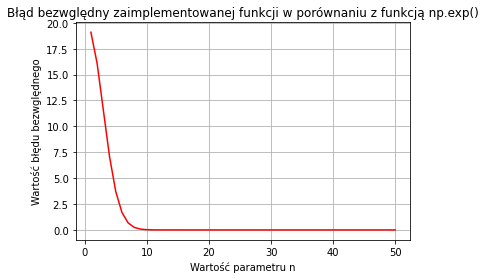

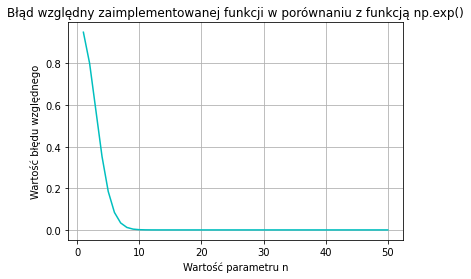

In [5]:
print(main.exponential(3,5))
print(main.exponential(3,10))
print(main.exponential(3,200))
print(np.exp(3))
n = [i for i in range(1,51)]
y = []
for i in range(0,len(n)):
    y.append(main.absolut_error(np.exp(3),main.exponential(3,n[i])))
plt.plot(n,y,'r')
plt.title("Błąd bezwględny zaimplementowanej funkcji w porównaniu z funkcją np.exp()")
plt.xlabel("Wartość parametru n")
plt.ylabel("Wartość błędu bezwględnego")
plt.grid()
y_ = []
plt.figure()
for i in range(0,len(n)):
    y_.append(main.relative_error(np.exp(3),main.exponential(3,n[i])))
plt.plot(n,y_,'c')
plt.title("Błąd względny zaimplementowanej funkcji w porównaniu z funkcją np.exp()")
plt.grid()
plt.xlabel("Wartość parametru n")
plt.ylabel("Wartość błędu względnego")

Zwiększająć nasze 'n' czyli dokładność przybliżenia otrzymujemy wyniki coraz bliższe wynikowi otrzymanemu dzięki funkcji numpy.exp. Po przekroczeniu wartości n = 10 błąd jest bliski zeru i dąży do niego. Musimy pamiętać, że jeseśmy ograniczeni, gdyż jeśli wybierzemy sobie duże n to spowoduje to wyrzucenie programu poperzez przepełnienie pamięci spowodowane bardzo dużą wielkością silni.

***Zadania 4.***  
Zaimplementuj 2 funkcje $coskx1$ i $coskx2$, realizujące rekurencyjnie przybliżanie wartości $cos(kx)$ w następujący sposób:

- Metoda 1:         
$cos(m+1)x = 2cosx \cdot cos(mx) - cos(m-1)x$
- Metoda 2:     
$cos(mx) = cosx \cdot cos(m-1)x - sinx \cdot sin(m-1)x$       
$sin(mx) = sinx \cdot cos(m-1)x + cosx \cdot sin(m-1)x$

Następnie przeanalizuj otrzymane rezultaty dla różnych $k$.

**Wskazówka** Do wyliczenia wartości $sin(x)$, $cos(x)$ (dla $k=1$) można użyć funkcji biblioteki numpy. 
Pozostałe wartości dla $k>1$ należy wyznaczyć rekurencyjnie.

In [6]:
print("Pierwsza metoda:")
print(main.coskx1(1,np.pi))
print(np.cos(np.pi),end ="\n\n")

print(main.coskx1(5,np.pi/5))
print(np.cos(np.pi),end ="\n\n")

print(main.coskx1(2,np.pi/6))
print(np.cos(np.pi/3),end ="\n\n")

print(main.coskx1(1,np.pi/6))
print(np.cos(np.pi/6),end ="\n\n")

print(main.coskx1(5,np.pi/30))
print(np.cos(np.pi/6))
print("Wyniki są bardzo zblizone do siebie a po zaokrągleniu były by takie same, możemy zauważyć,że dla zwiekszonych k wyniki troszkę się róźnią")
print("Druga metoda:")
print(main.coskx2(1,np.pi)[0])
print(main.coskx2(10,np.pi/10)[0])
print(np.cos(np.pi),end ="\n\n")

print(main.coskx2(1,np.pi/2)[1])
print(main.coskx2(5,np.pi/10)[1])
print(np.sin(np.pi/2),end ="\n\n")

print(main.coskx2(1,np.pi/3)[0])
print(main.coskx2(10,np.pi/30)[0])
print(np.cos(np.pi/3),end ="\n\n")

print(main.coskx2(1,np.pi/3)[1])
print(main.coskx2(10,np.pi/30)[1])
print(np.sin(np.pi/3),end ="\n\n")

print("Druga metoda również daje wyniki bardzo zbliżone do siebie, które po zaokrągleniu były by takie same.\nMusimy pamiętać, że z racji tego że są to metody rekurencyjne, nie możemy ustawić zbyt dużego parametru k ponieważ spowoduje to problem z wydajnością programu")




Pierwsza metoda:
-1.0
-1.0

-0.9999999999999999
-1.0

0.5000000000000002
0.5000000000000001

0.8660254037844387
0.8660254037844387

0.8660254037844377
0.8660254037844387
Wyniki są bardzo zblizone do siebie a po zaokrągleniu były by takie same, możemy zauważyć,że dla zwiekszonych k wyniki troszkę się róźnią
Druga metoda:
-1.0
-0.9999999999999994
-1.0

1.0
0.9999999999999998
1.0

0.5000000000000001
0.5
0.5000000000000001

0.8660254037844386
0.8660254037844384
0.8660254037844386

Druga metoda również daje wyniki bardzo zbliżone do siebie, które po zaokrągleniu były by takie same.
Musimy pamiętać, że z racji tego że są to metody rekurencyjne, nie możemy ustawić zbyt dużego parametru k ponieważ spowoduje to problem z wydajnością programu


***Zadanie 5.***  
Wiedząc, że
$\begin{aligned}
\sum_{n=1}^{\infty} \cfrac{1}{n^2} = \cfrac{1}{6} \pi^2
\end{aligned}$,
napisz kod w Pythonie (funkcja *pi*) obliczający przybliżenie liczby pi (nie korzystaj ze stałych <i>numpy.pi</i>, <i>math.pi</i> itp.). 

1. Z jakimi rodzajami błędów numerycznych mamy tu do czynienia? 
2. Sporządź wykresy błędów bezwzględnych i względnych w stosunku do stałej numpy.pi w zależności od wartości $n$.  

**Wskazówka** Do wizualizacji wyników użyj skali logarytmicznej.

Mamy tutaj doczynienia z błędem obcięcia, ponieważ liczymy tutaj sume dążącą do + nieskończoności, co jest samo w sobie niewykonalne dla komputera, więc musi on skrócić zakres

Im większy parametr n zadamy , tym dokładniejszą postać liczby pi dostaniemy. Przy n = 50 otrzymujemy już błąd względny równy 1%, a przy wzroście n ta wartość cały czas dąży do 0 


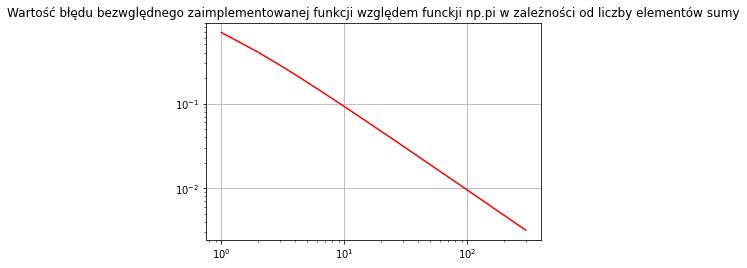

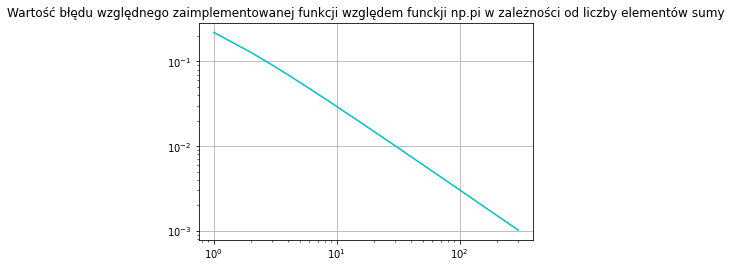

In [7]:
n = [i for i in range(1,300)]
y = []
for i in range(0,len(n)):
    y.append(main.absolut_error(np.pi,main.pi(n[i])))
plt.loglog(n,y,'r')
plt.title("Wartość błędu bezwględnego zaimplementowanej funkcji względem funckji np.pi w zależności od liczby elementów sumy")
plt.grid()

y_ = []
for i in range(0,len(n)):
    y_.append(main.relative_error(np.pi,main.pi(n[i])))
plt.figure()
plt.loglog(n,y_,'c')
plt.title("Wartość błędu względnego zaimplementowanej funkcji względem funckji np.pi w zależności od liczby elementów sumy")
plt.grid()
print("Im większy parametr n zadamy , tym dokładniejszą postać liczby pi dostaniemy. Przy n = 50 otrzymujemy już błąd względny równy 1%, a przy wzroście n ta wartość cały czas dąży do 0 ")


***Zadanie 6.***  
Używając funkcji timeit oraz memit zbadaj czas działania oraz zużycie pamięci funkcji z Zadania 4 w zalożności od różnych wartości $n$.     
Sporządź wykresy:
- czasu obliczenia danego przybliżenia liczby pi w zależności od $n$. 
W tym celu wykorzystaj funkcje [errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) oraz zwracane przez *timeit* wartości średnie oraz ich odchylenie standardowe. 
- błędu bezwzględnego przybliżenia liczby pi od czasu jego wykonania.



**Wskazówka** Użyj opcji -o (output) dla *timeit* aby zapisać wynik do zmiennej. Opcje -r (runs) i -n (ilość pentli) decydują o ilości wykonanych prób.     
Do wizualizacji wyników użyj skali logarytmicznej.

Mamy

SIZE:  1
Timing: 
2.66 µs ± 822 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 103.86 MiB, increment: 0.01 MiB


SIZE:  2
Timing: 
4.21 µs ± 1.21 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 103.86 MiB, increment: 0.00 MiB


SIZE:  3
Timing: 
4.47 µs ± 921 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 103.86 MiB, increment: 0.00 MiB


SIZE:  4
Timing: 
4.88 µs ± 1.12 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 103.86 MiB, increment: 0.00 MiB


SIZE:  5
Timing: 
5.11 µs ± 930 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 103.86 MiB, increment: 0.00 MiB


SIZE:  6
Timing: 
7.12 µs ± 1.15 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 103.82 MiB, increment: 0.00 MiB


SIZE:  7
Timing: 
5.76 µs ± 949 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory us

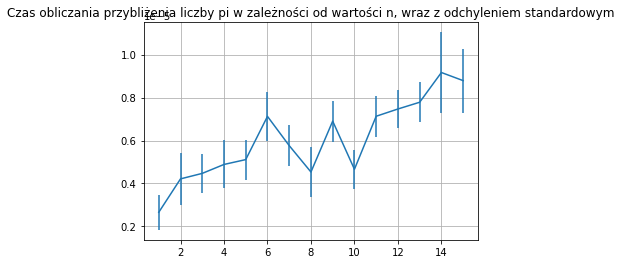

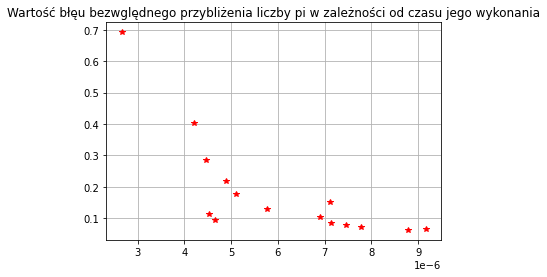

In [8]:
n = [i for i in range(1,16)]
time = []
std = []
err = []

for k in n:
    print('SIZE: ', k)
    print('Timing: ')
    saved_timing = %timeit -r 5 -n 10 -o main.pi(k)
    saved_timing.average   # średni czas próby
    saved_timing.stdev     # odchylenie standardowe
    print('Memory usage: ')
    time.append(saved_timing.average)
    std.append(saved_timing.stdev)
    err.append(main.absolut_error(np.pi,main.pi(k)))
    %memit main.pi(k)
    print('\n')
plt.errorbar(n,time,yerr = std)
plt.grid()
plt.title("Czas obliczania przybliżenia liczby pi w zależności od wartości n, wraz z odchyleniem standardowym")
plt.show()
plt.figure
plt.plot(time,err,'r*')
plt.grid()
plt.title("Wartość błęu bezwględnego przybliżenia liczby pi w zależności od czasu jego wykonania")
plt.show()